In [16]:
import os
import glob
import nltk
import textstat
import matplotlib.pyplot as plt
import numpy as np

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ih8l1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
project_folder = './'
text_files_folder = os.path.join(project_folder, 'Text_Files')

In [3]:
def read_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read().strip()
            return content
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""


In [6]:
text_files_paths = glob.glob(os.path.join(text_files_folder, '*.txt'))
file_contents = [read_file(file_path) for file_path in text_files_paths]

file_contents = [text for text in file_contents if text]
text_files_paths = [file_path for file_path, text in zip(text_files_paths, file_contents) if text]

if not text_files_paths:
    raise ValueError("No valid content in Text_Files.")


In [21]:
readability_results = {}
for file_path, content in zip(text_files_paths, file_contents):
    scores = {
        'Flesch-Kincaid Grade Level': textstat.flesch_kincaid_grade(content),
        #'Flesch Reading Ease': textstat.flesch_reading_ease(content), Removed as it's the inverse of F-K Grade
        'Gunning Fog Index': textstat.gunning_fog(content),
        'SMOG Index': textstat.smog_index(content),
        'Coleman-Liau Index': textstat.coleman_liau_index(content),
        'Automated Readability Index': textstat.automated_readability_index(content),
        'Dale-Chall Readability Score': textstat.dale_chall_readability_score(content)
    }
    readability_results[file_path] = scores


In [22]:
# Extract score names from the first entry in readability_results
score_names = list(next(iter(readability_results.values())).keys())

# Normalize readability scores
normalized_scores = {}
for score_name in score_names:
    initial_value = readability_results[text_files_paths[0]][score_name]
    normalized_scores[score_name] = [
        (score / initial_value) * 100 for score in [scores[score_name] for scores in readability_results.values()]
    ]

# Ensure first value is exactly 100% for each score
for score_name in normalized_scores:
    normalized_scores[score_name][0] = 100.0


In [23]:
def simplify_name(name):
    return name[-12:-8] if len(name) >= 12 else name

simplified_names = [simplify_name(os.path.basename(path)) for path in text_files_paths]
score_names = list(next(iter(readability_results.values())).keys())

# Create a unified dictionary for plotting
plot_data = {score_name: np.array(normalized_scores[score_name]) for score_name in score_names}
plot_data['x'] = np.arange(len(simplified_names))

# Determine appropriate tick locations and labels
tick_step = max(1, len(simplified_names) // 10)
x_ticks = range(0, len(simplified_names), tick_step)
x_labels = [simplified_names[i] for i in x_ticks]


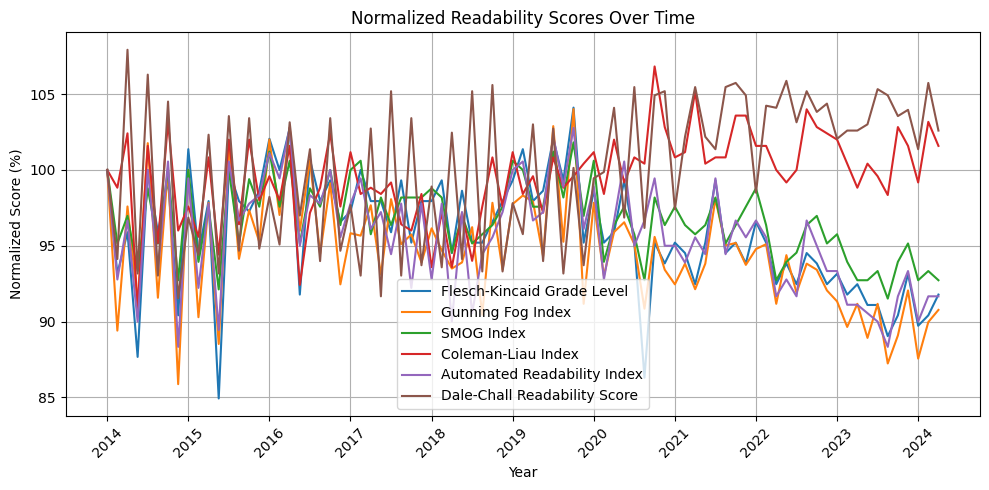

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

for score_name in score_names:
    ax.plot(plot_data['x'], plot_data[score_name], label=score_name)

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45)

ax.set_xlabel('Year')
ax.set_ylabel('Normalized Score (%)')
ax.set_title('Normalized Readability Scores Over Time')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()
